In [126]:
import matplotlib.pyplot as plt
import numpy as np
from qiskit import QuantumCircuit, Aer, transpile, assemble
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_histogram
from numpy.random import randint
from qiskit.circuit import controlledgate
import pandas as pd
from qiskit.circuit.library.standard_gates import PhaseGate
import math
PI = math.pi
print("Imported Successfully")

Imported Successfully


In [127]:
def draw_state_vector(qc, comment="This is a full state"):
    print(comment)
    display(Statevector.from_instruction(qc).draw("latex"))
    display(Statevector.from_instruction(qc).draw("bloch"))

# Pushing the limits of Qiskit with 500 qubits

In [133]:
num_qubits = 500
simulator = Aer.get_backend('aer_simulator')
circ = QuantumCircuit(num_qubits, num_qubits)

# Create EPR state
circ.h(0)
for i in range (0, num_qubits-1):
    circ.cx(i, i+1)

# Measure
circ.measure(range(num_qubits), range(num_qubits))

tcirc = transpile(circ, simulator)
result = simulator.run(tcirc).result()
print("Time taken: {} sec".format(result.time_taken))
result.get_counts()


Time taken: 132.45538592338562 sec


{'00000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000': 478,
 '11111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111

# Phase kickback with PhaseGate

Before applying controlled phase gate:


<IPython.core.display.Latex object>

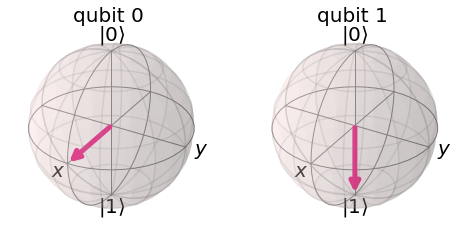

After applying controlled phase gate:


<IPython.core.display.Latex object>

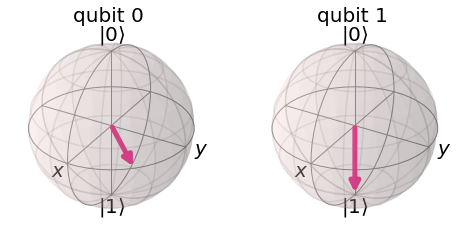

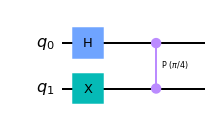

In [130]:
qc = QuantumCircuit(2)
qc.h(0)
qc.x(1)
draw_state_vector(qc, "Before applying controlled phase gate:")
cP4 = PhaseGate(PI/4).control(1)
qc.append(cP4, [0, 1])
draw_state_vector(qc, "After applying controlled phase gate:")
display(qc.draw("mpl"))

# Phase kickback with CNOT gate

Before applying CNOT:


<IPython.core.display.Latex object>

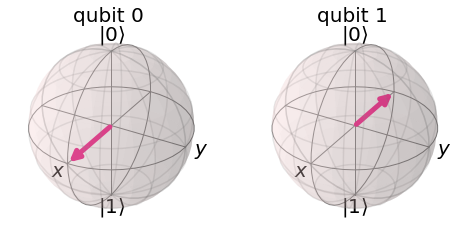

After applying CNOT:


<IPython.core.display.Latex object>

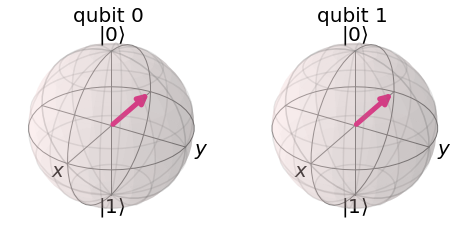

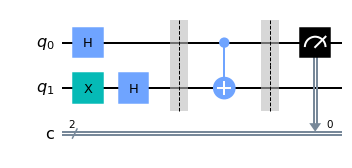

In [131]:
circ = QuantumCircuit(2, 2)
circ.h(0)
circ.x(1)
circ.h(1)
draw_state_vector(circ, "Before applying CNOT:")
circ.barrier()
circ.cx(0, 1)
circ.barrier()
draw_state_vector(circ, "After applying CNOT:")

circ.measure(0, 0)

circ.draw("mpl")

# Phase kickback with flipped CNOT gate

Before applying flipped CNOT:


<IPython.core.display.Latex object>

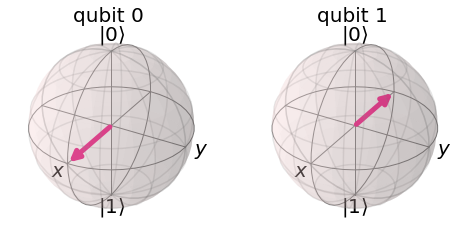

See that global phase does not matter. After applying flipped CNOT:


<IPython.core.display.Latex object>

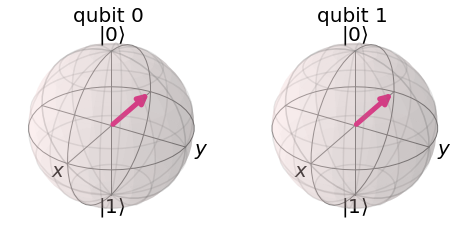

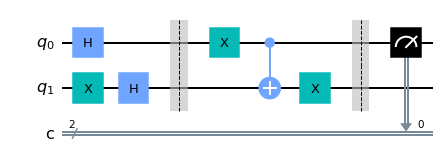

In [132]:
circ = QuantumCircuit(2, 2)
circ.h(0)
circ.x(1)
circ.h(1)
draw_state_vector(circ, "Before applying flipped CNOT:")
circ.barrier()
circ.x(0)
circ.cx(0, 1)
circ.x(1)
circ.barrier()
draw_state_vector(circ, "See that global phase does not matter. After applying flipped CNOT:")
circ.measure(0, 0)

circ.draw("mpl")

# Deutsch algorithm

In [134]:
def d_oracle(case):
    oracle = QuantumCircuit(2)
    
    # Do the output magic
    oracle.x(1)
    oracle.h(1)
    
    # randomly swap the whole output.
    # this adds a possibility to return one of
    # [f(0) = 0; f(1) = 0] or [f(0) = 1; f(1) = 1]
    # in a constant case.
    if bool(randint(2)):
        oracle.z(1)
    
    # First, let's deal with the case in which oracle is balanced
    if case == "balanced":
        oracle.cx(0, 1)
    # Case in which oracle is constant
    if case == "constant":
        pass
    
        
    
    oracle_gate = oracle.to_gate()
    oracle_gate.name = "Phase Oracle" # To show when we display the circuit
    return oracle_gate

In [135]:
def d_algorithm(oracle):
    dj_circuit = QuantumCircuit(2, 1)
    
    # input prepare
    dj_circuit.h(0)
    
    dj_circuit.barrier()

    # Let's append the oracle gate to our circuit:
    dj_circuit.append(oracle, [0, 1])
    
    dj_circuit.barrier()
    
    # Finally, perform the H-gate again and measure:
    dj_circuit.h(0)
    dj_circuit.measure(0, 0)
    
    return dj_circuit

In [140]:
def run_experiment(case):
    oracle_gate = d_oracle(case)
    circuit = d_algorithm(oracle_gate)
    display(circuit.draw(output="mpl"))
    
    aer_sim = Aer.get_backend('aer_simulator')
    qobj = assemble(transpile(circuit, aer_sim))
    results = aer_sim.run(qobj).result()
    answer = results.get_counts()

    print(case)
    return plot_histogram(answer)

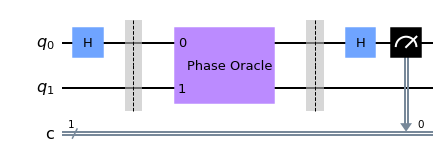

constant


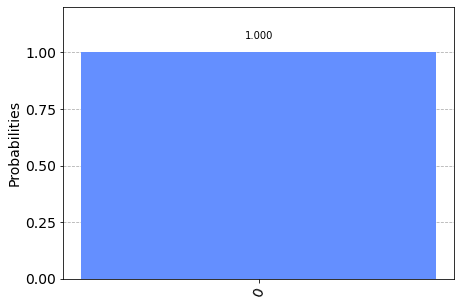

In [141]:
# case = "balanced" if np.random.randint(2) == 0 else "constant"
case = "constant"
run_experiment(case)  

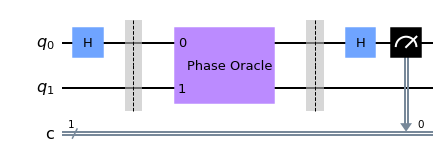

balanced


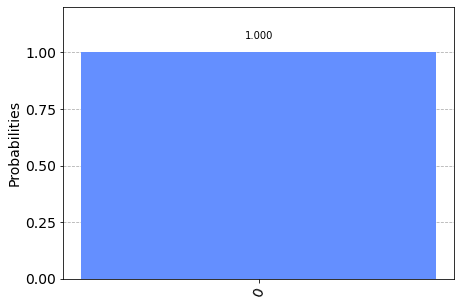

In [145]:
case = "balanced"
run_experiment(case)